## Classification Assignment

**Name**: Tushar Choudhary  
**Roll Number**: 2019111019

## Solution

**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from prettytable import PrettyTable
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Getting the dataset**

In [2]:
df = pd.read_excel('Indian Earthquakes List Update_Magnitudes.xls')
df

,Earthquake Engineering Research Centre,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,International Institute of Information Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Gachibowli, Hyderabad - 500 032 India",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INDIAN EARTHQUAKES CATALOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PERIOD : 2474 BC - 2015 AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52994,52970,2019,7,28,19:24:08,00:54:08/2019-07-29/,3.2,3.2,NaN,3.074275,2.323766,2.915005,32.8°N,78.4°E,10,NaN,NaN,NaN,Jammu & Kashmir,NaN
52995,52971,2019,7,28,10:44:10,16:14:10,3.6,3.6,NaN,3.436594,2.783008,3.334732,25.5°N,90.4°E,70,NaN,NaN,NaN,"Distt. East Garo Hills ,Meghalaya",NaN
52996,52972,2019,7,28,21:25:06,2019-07-29 02:55:06,4,4,NaN,3.798913,3.24225,3.75446,23.2°N,86.5°E,22,NaN,NaN,NaN,"Distt. Puruliya, West Bengal",NaN
52997,52973,2019,7,29,03:33:53,09:03:53,4.3,4.3,NaN,4.070652,3.586682,4.069255,32.8°N,76.4°E,20,NaN,NaN,NaN,"Distt. Lahaul-Spiti,Himachal Pradesh",NaN


**Getting the metadata**

In [3]:
first_row = 8  # set these rows after analysing the excel file
last_row = 9

header=df.iloc[first_row:last_row+1,:].values

for i in range(len(header[0])):
    print(i, header[0][i], header[1][i])

0 Sl. No. nan
1 YEAR  nan
2 MONTH  nan
3 DATE nan
4 ORIGIN TIME (UTC)
5 nan (IST)
6 MAGNITUDE Mw 
7 nan Mw
8 nan Mb
9 nan Mb
10 nan Ms
11 nan ML
12 LAT (N) nan
13 LONG (E) nan
14 DEPTH (km) nan
15 INTENSITY MM
16 nan MMI
17 nan MME
18 LOCATION nan
19 REFERENCE nan


**Picking all numerical attributes and selecting which ones to use**

In [4]:
attributes = [1,2,3,4,12,13,14,15,6]
att_names = ['Year', 'Month', 'Date', 'Time', 'Lat', 'Long', 'Depth', 'Intensity', 'Magnitude']
X=df.iloc[last_row+1:,attributes]

t_tab = PrettyTable(['Column Index', 'Attribute Name', 'Number of null values'])

for i in range(len(attributes)):
    t_tab.add_row([attributes[i], att_names[i], X.iloc[:,i].isnull().sum()])

print(t_tab)

+--------------+----------------+-----------------------+
| Column Index | Attribute Name | Number of null values |
+--------------+----------------+-----------------------+
|      1       |      Year      |           0           |
|      2       |     Month      |           18          |
|      3       |      Date      |           57          |
|      4       |      Time      |         31803         |
|      12      |      Lat       |           0           |
|      13      |      Long      |           0           |
|      14      |     Depth      |          2178         |
|      15      |   Intensity    |         52948         |
|      6       |   Magnitude    |         12054         |
+--------------+----------------+-----------------------+


**Since number of null values in the column for time and intensity are too many, we'll not use them. Let's visualize the dataset once, after removing these columns**

In [5]:
attributes = [1,2,3,12,13,14,6]
att_names = ['Year', 'Month', 'Date', 'Lat', 'Long', 'Depth', 'Magnitude']
X=df.iloc[last_row+1:,attributes]
X

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 6
10,-2474,0,0,71,24,0,7.5
11,-325,0,0,71,24,0,7.5
12,25,0,0,72.9,33.72,0,7.5
13,26,5,10,17.3,80.1,NaN,6.1397
14,26,5,10,26,97,80,6.1397
...,...,...,...,...,...,...,...
52994,2019,7,28,32.8°N,78.4°E,10,3.2
52995,2019,7,28,25.5°N,90.4°E,70,3.6
52996,2019,7,28,23.2°N,86.5°E,22,4
52997,2019,7,29,32.8°N,76.4°E,20,4.3


**Now since we will be predicting the label Mw, we will remove all rows that have null value in its place. So around 12000 rows will be removed for which the magnitute is not a number**

In [6]:
X_temp=np.array([])
X=np.array(X)

sm=0
cnt=0

for i in range(len(X)):
    if X[i,6] is not np.nan:
        X_temp=np.append(X_temp,i)
        sm = sm + X[i,6]
        cnt = cnt+1

X_temp=X_temp.astype(int)
X=X[X_temp,:]
X.shape

(40935, 7)

**Calculating the mean Mw value and setting our threshold equal to it**

In [7]:
threshold = sm/cnt
threshold

4.537564295818176

**Storing the magnitude in a separate list**

In [8]:
Y=X[:,6]
X=X[:,0:6]

print("Y shape: ", Y.shape)
print("X shape: ", X.shape)

Y shape:  (40935,)
X shape:  (40935, 6)


**Converting latitude and longitude objects to numercial values**

In [9]:
for col in range(3,5):
    toReplace=['ｰ','°','N','S','E','W']
    for j in range(X.shape[0]):
        i=X[j,col]
        if type(i) is str:
            i=i.replace(',','.')
            flag=1
            if 'S' in i or 'W' in i:
                flag=-1
            for c in toReplace:
                i=i.replace(c,'')
            X[j,col]=flag*float(i)

for j in range(X.shape[0]):
    if type(X[j,1]) is str:
        X[j,1]=0

X=X.astype(float)
Y=Y.astype(float)

**Imputing month and date by most frequent and depth by mean**

In [10]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
for j in range(X.shape[0]):
    if X[j,1]==0:
        X[j,1]=np.nan
imputer=imputer.fit(X[:,1:2])
X[:,1:2]=imputer.transform(X[:,1:2])

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
for j in range(X.shape[0]):
    if X[j,2]==0:
        X[j,2]=np.nan
imputer=imputer.fit(X[:,2:3])
X[:,2:3]=imputer.transform(X[:,2:3])
    
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, 5:6])
X[:, 5:6] = imputer.transform(X[:, 5:6])

**Setting threshold for Mw values as 4.5**

In [11]:
for i in range(Y.shape[0]):
    if threshold<Y[i]: Y[i]=1
    else: Y[i]=0

**Initialising testing set for later use to measure performance for best K and D**

In [12]:
testing_ratio = 0.2
random_flag = 0
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = testing_ratio, random_state = random_flag)

**Initialising training and validation set for training the KNN and DT**

In [13]:
testing_ratio = 0.25
random_flag = 0
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = testing_ratio, random_state = random_flag)

**Scaling had been done earlier but was removed to keep track of variables while using Decision Trees**. Otherwise the results were not interpretable, which can be seen in the example image below:  
<img src="standard.png" alt="drawing" width="1000"/>

In [14]:
'''
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
'''

'\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\nX_val = scaler.transform(X_val)\n'

**Fitting KNN to the training set, choosing the best K based on results on validation test and then getting result for the best K on testing set**

In [15]:
tpr_knn=np.array([])
fpr_knn=np.array([])
best_k=3
best_ratio=0

for i in range(35,66):
    
    classifier = KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_val)
    confusion = confusion_matrix(y_val,y_pred_knn)
    
    tpr_knn_val = confusion[1][1]/(confusion[1][1]+confusion[1][0])
    tpr_knn = np.append(tpr_knn,tpr_knn_val)
    
    fpr_knn_val = confusion[0][1]/(confusion[0][1]+confusion[0][0])
    fpr_knn = np.append(fpr_knn,fpr_knn_val)
    
    if tpr_knn_val/fpr_knn_val > best_ratio:
        best_ratio = tpr_knn_val/fpr_knn_val
        best_k = i
    
    print("Confusion Matrix for K="+str(i))
    print(confusion)
    print()
    
print("Best K = "+str(best_k))
print()

classifier=KNeighborsClassifier(n_neighbors=best_k,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
confusion = confusion_matrix(y_test,y_pred_knn)
print("Confusiong matrix after using best K on testing set")
print(confusion)

Confusion Matrix for K=35
[[4216  695]
 [1590 1686]]

Confusion Matrix for K=36
[[4277  634]
 [1664 1612]]

Confusion Matrix for K=37
[[4229  682]
 [1611 1665]]

Confusion Matrix for K=38
[[4284  627]
 [1669 1607]]

Confusion Matrix for K=39
[[4235  676]
 [1606 1670]]

Confusion Matrix for K=40
[[4275  636]
 [1671 1605]]

Confusion Matrix for K=41
[[4237  674]
 [1626 1650]]

Confusion Matrix for K=42
[[4285  626]
 [1677 1599]]

Confusion Matrix for K=43
[[4244  667]
 [1643 1633]]

Confusion Matrix for K=44
[[4294  617]
 [1691 1585]]

Confusion Matrix for K=45
[[4255  656]
 [1642 1634]]

Confusion Matrix for K=46
[[4296  615]
 [1686 1590]]

Confusion Matrix for K=47
[[4242  669]
 [1642 1634]]

Confusion Matrix for K=48
[[4295  616]
 [1690 1586]]

Confusion Matrix for K=49
[[4243  668]
 [1649 1627]]

Confusion Matrix for K=50
[[4288  623]
 [1694 1582]]

Confusion Matrix for K=51
[[4260  651]
 [1659 1617]]

Confusion Matrix for K=52
[[4291  620]
 [1693 1583]]

Confusion Matrix for K=53
[[

**Fitting Decision Tree to the training set, choosing the best D based on results on validation test and then getting result for the best K on testing set**

In [16]:
tpr_dtc=np.array([])
fpr_dtc=np.array([])
best_d=1
best_ratio=0

for i in range(1,21):

    classifier2 = DecisionTreeClassifier(random_state=1,max_depth=i)
    classifier2.fit(X_train, y_train)
    y_pred_dtc= classifier2.predict(X_val)
    confusion=confusion_matrix(y_val,y_pred_dtc)
    
    tpr_dtc_val = confusion[1][1]/(confusion[1][1]+confusion[1][0])
    tpr_dtc=np.append(tpr_dtc,tpr_dtc_val)
    
    fpr_dtc_val = confusion[0][1]/(confusion[0][1]+confusion[0][0])
    fpr_dtc=np.append(fpr_dtc,fpr_dtc_val)    
    
    if best_ratio < tpr_dtc_val/fpr_dtc_val:
        best_ratio=tpr_dtc_val/fpr_dtc_val
        best_d=i    
    
    print("Confusion Matrix for D="+str(i))
    print(confusion)
    print()
    
print("Best D=" + str(best_d))
print()

classifier2 = DecisionTreeClassifier(random_state=1,max_depth=best_d)
classifier2.fit(X_train, y_train)
y_pred_dtc= classifier2.predict(X_test)
confusion=confusion_matrix(y_test,y_pred_dtc)
print("Confusiong matrix after using best D on testing set")
print(confusion)

Confusion Matrix for D=1
[[4592  319]
 [2412  864]]

Confusion Matrix for D=2
[[3905 1006]
 [1755 1521]]

Confusion Matrix for D=3
[[4389  522]
 [2005 1271]]

Confusion Matrix for D=4
[[4429  482]
 [1984 1292]]

Confusion Matrix for D=5
[[4494  417]
 [1968 1308]]

Confusion Matrix for D=6
[[4278  633]
 [1686 1590]]

Confusion Matrix for D=7
[[4389  522]
 [1769 1507]]

Confusion Matrix for D=8
[[4295  616]
 [1671 1605]]

Confusion Matrix for D=9
[[4418  493]
 [1781 1495]]

Confusion Matrix for D=10
[[4241  670]
 [1610 1666]]

Confusion Matrix for D=11
[[4249  662]
 [1678 1598]]

Confusion Matrix for D=12
[[4172  739]
 [1609 1667]]

Confusion Matrix for D=13
[[4097  814]
 [1547 1729]]

Confusion Matrix for D=14
[[4162  749]
 [1611 1665]]

Confusion Matrix for D=15
[[4002  909]
 [1545 1731]]

Confusion Matrix for D=16
[[3958  953]
 [1509 1767]]

Confusion Matrix for D=17
[[3877 1034]
 [1518 1758]]

Confusion Matrix for D=18
[[3811 1100]
 [1502 1774]]

Confusion Matrix for D=19
[[3764 1147

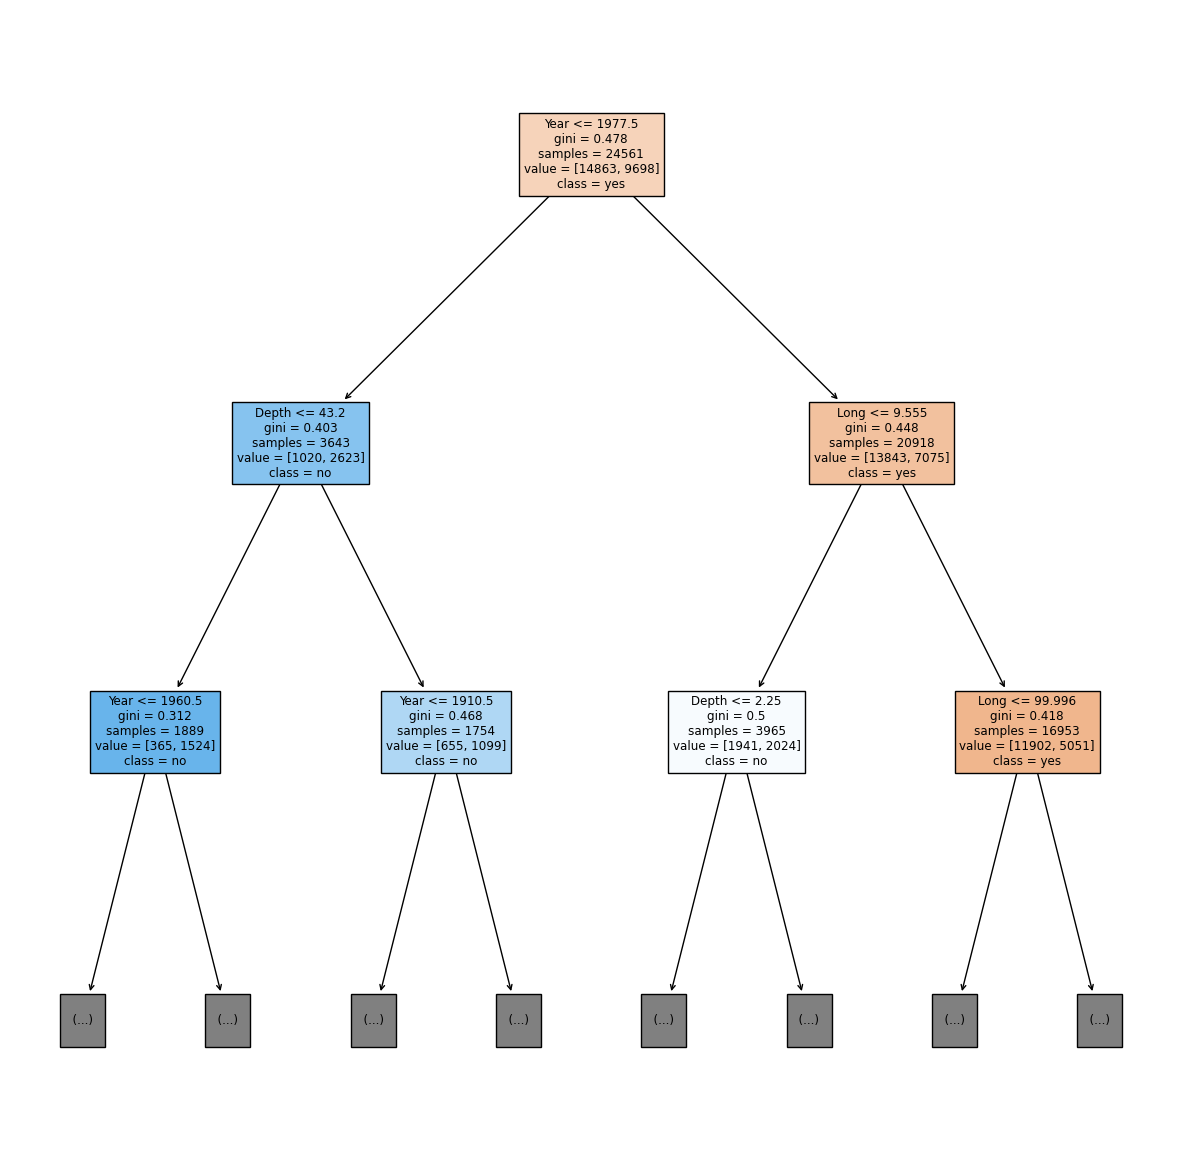

In [17]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(classifier2,
                   max_depth = 2,
                   feature_names=att_names[:6],  
                   class_names=["yes","no"],
                   filled=True)
plt.show()

**Fitting Random Forest Classifier to the training set, choosing the best D based on results on validation test and then getting result for the best K on testing set**

In [18]:
tpr_rfc=np.array([])
fpr_rfc=np.array([])
best_n=1
best_ratio=0

for _ in range(1,21):

    classifier3 = RandomForestClassifier(random_state=1,max_depth=5,n_estimators=_)
    classifier3.fit(X_train, y_train)
    
    y_pred_rfc = classifier3.predict(X_val)
    confusion = confusion_matrix(y_val,y_pred_rfc)
    
    tpr_rfc_val = confusion[1][1]/(confusion[1][1]+confusion[1][0])
    tpr_rfc=np.append(tpr_rfc,tpr_rfc_val)
    
    fpr_rfc_val = confusion[0][1]/(confusion[0][1]+confusion[0][0])
    fpr_rfc=np.append(fpr_rfc,fpr_rfc_val)    
    
    if best_ratio < tpr_rfc_val/fpr_rfc_val:
        best_ratio=tpr_rfc_val/fpr_rfc_val
        best_n=_
    
    print("Confusion Matrix for n_estimators = "+str(_))
    print(confusion)
    print()
    
print("Best n_estimator = " + str(best_n))
print()

classifier3 = RandomForestClassifier(random_state=1,max_depth=best_d)
classifier3.fit(X_train, y_train)
y_pred_rfc= classifier3.predict(X_test)
confusion=confusion_matrix(y_test,y_pred_rfc)
print("Confusiong matrix after using best n_estimator on testing set")
print(confusion)

Confusion Matrix for n_estimators = 1
[[4246  665]
 [2422  854]]

Confusion Matrix for n_estimators = 2
[[4323  588]
 [2114 1162]]

Confusion Matrix for n_estimators = 3
[[4411  500]
 [1959 1317]]

Confusion Matrix for n_estimators = 4
[[4391  520]
 [1978 1298]]

Confusion Matrix for n_estimators = 5
[[4505  406]
 [2066 1210]]

Confusion Matrix for n_estimators = 6
[[4506  405]
 [2076 1200]]

Confusion Matrix for n_estimators = 7
[[4533  378]
 [2067 1209]]

Confusion Matrix for n_estimators = 8
[[4443  468]
 [1979 1297]]

Confusion Matrix for n_estimators = 9
[[4503  408]
 [2048 1228]]

Confusion Matrix for n_estimators = 10
[[4520  391]
 [2047 1229]]

Confusion Matrix for n_estimators = 11
[[4466  445]
 [1994 1282]]

Confusion Matrix for n_estimators = 12
[[4492  419]
 [2005 1271]]

Confusion Matrix for n_estimators = 13
[[4488  423]
 [2007 1269]]

Confusion Matrix for n_estimators = 14
[[4471  440]
 [1993 1283]]

Confusion Matrix for n_estimators = 15
[[4468  443]
 [1996 1280]]

Conf

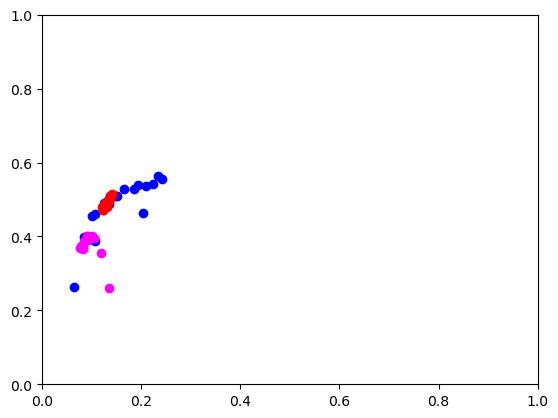

In [19]:
plt.clf()
plt.plot(fpr_dtc, tpr_dtc,linestyle='none',marker='o',color='blue')
plt.plot(fpr_knn, tpr_knn,linestyle='none',marker='o',color='red')
plt.plot(fpr_rfc, tpr_rfc,linestyle='none',marker='o',color='magenta')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()